# Importing relevant libraries

In [112]:
#dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import LinearRegression, RidgeCV,LassoCV
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb


# Loading data

In [62]:
df = pd.read_csv("./datasets/house-prices-advanced-regression-techniques/train.csv")

In [63]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [64]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


# Preprocessing

## Dealing with missing values

In [65]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

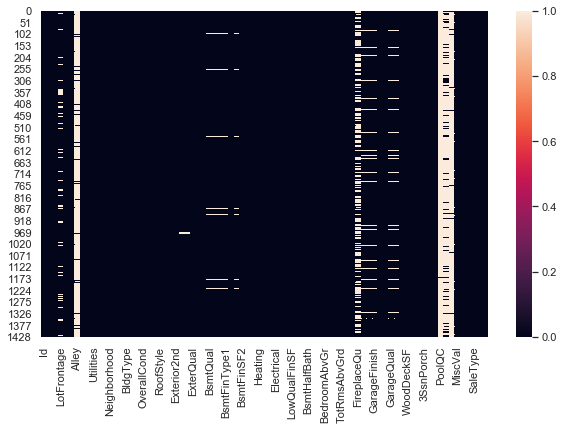

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

## Categorical variables

In [98]:
cat_var = df.select_dtypes(include='object').columns.values
cat_var

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype=object)

In [68]:
for cat in cat_var:
    print('Number of categories in ',cat, 'is ', len(df[cat].unique()), ': ')
    print(df[cat].value_counts(),'\n')

Number of categories in  MSZoning is  5 : 
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

Number of categories in  Street is  2 : 
Pave    1454
Grvl       6
Name: Street, dtype: int64 

Number of categories in  Alley is  3 : 
Grvl    50
Pave    41
Name: Alley, dtype: int64 

Number of categories in  LotShape is  4 : 
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

Number of categories in  LandContour is  4 : 
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 

Number of categories in  Utilities is  2 : 
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 

Number of categories in  LotConfig is  5 : 
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

Number of categories in  LandSlope is  3 : 
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 

Number of categories in  Neighborhood is

## Imputing Missing Values

In [69]:
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [70]:
df.drop(['MiscFeature', 'PoolQC', 'Alley', 'Fence'], axis=1, inplace=True)
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0]) 
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean().round())
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0]) 
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0]) 
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean()) 
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna('Abs')

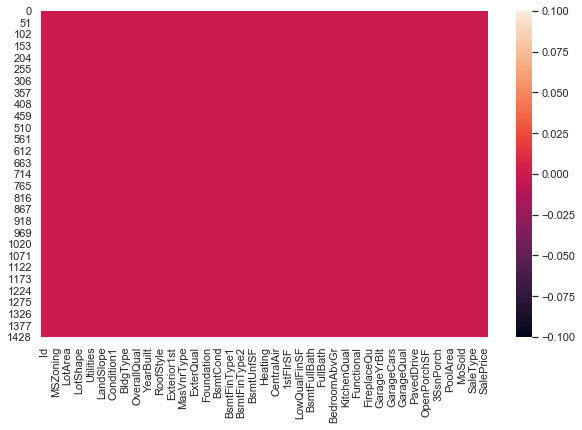

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [72]:
df_no_mv = df.copy()

# Exploring the PDFs

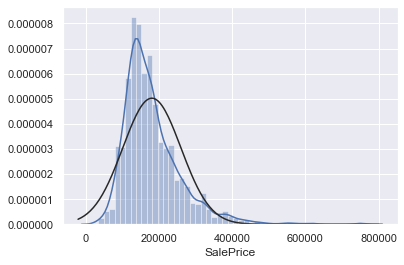

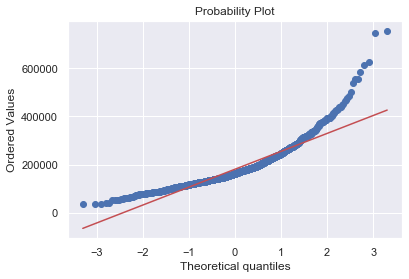

In [73]:
sns.distplot(df_no_mv['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_no_mv['SalePrice'], plot=plt)

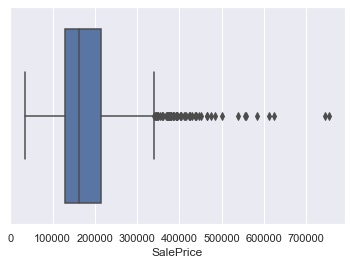

In [74]:
sns.boxplot(x=df_no_mv['SalePrice'])

## Dealing with outliers

In [75]:
df_no_mv['Log_SalePrice'] = np.log(df_no_mv['SalePrice'])

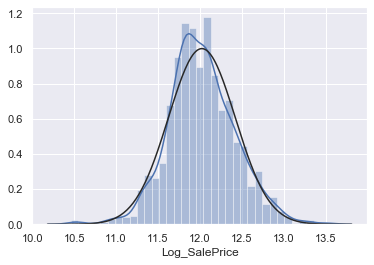

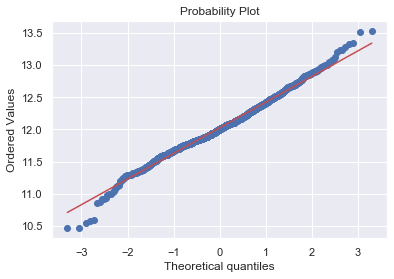

In [76]:
sns.distplot(df_no_mv['Log_SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_no_mv['Log_SalePrice'], plot=plt)

## Features

In [77]:
cat_var

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

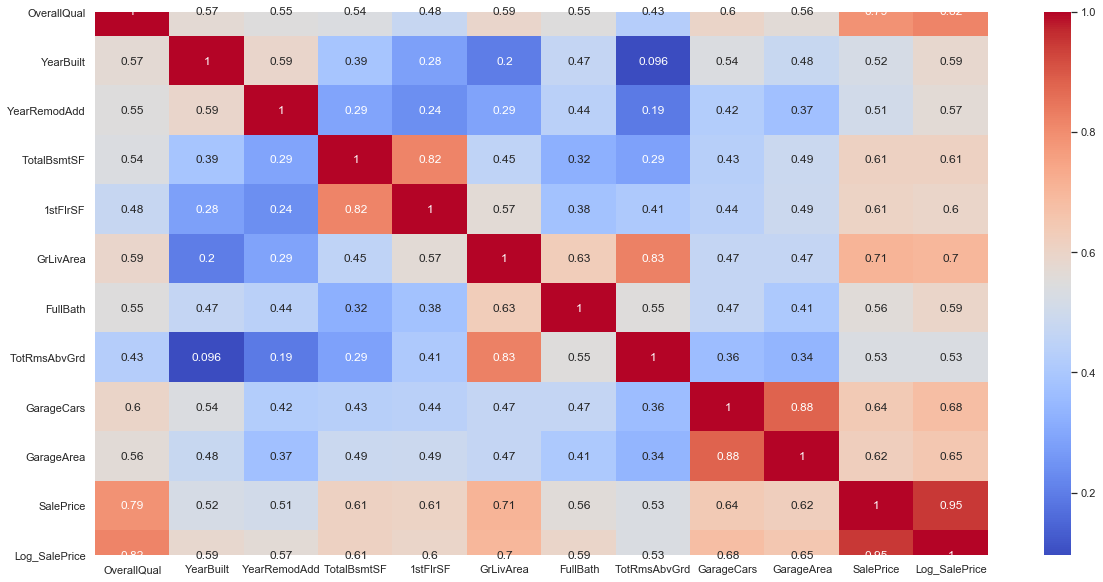

In [78]:
corr_matrix = df_no_mv.corr()
price_corr = df_no_mv.corr()['Log_SalePrice']
top_corr_features = price_corr[np.absolute(price_corr) > 0.5].index
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix.loc[top_corr_features,top_corr_features], cmap= 'coolwarm', annot=True)

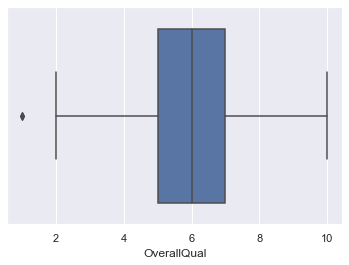

In [79]:
sns.boxplot(df_no_mv['OverallQual'])

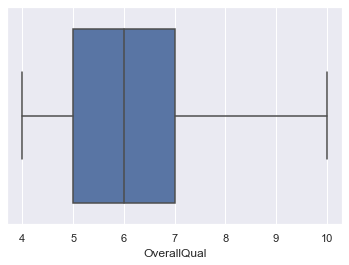

In [80]:
q = df_no_mv['OverallQual'].quantile(0.01)
df_no_mv = df_no_mv[df_no_mv['OverallQual']>q]
sns.boxplot(df_no_mv['OverallQual'])

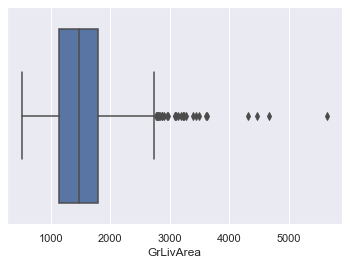

In [81]:
sns.boxplot(df_no_mv['GrLivArea'])

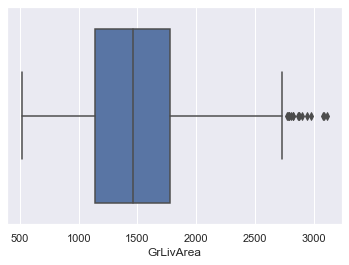

In [82]:
q = df_no_mv['GrLivArea'].quantile(0.99)
df_no_mv = df_no_mv[df_no_mv['GrLivArea']<q]
sns.boxplot(df_no_mv['GrLivArea'])

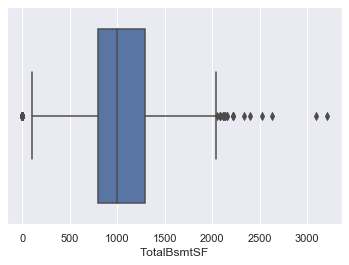

In [83]:
sns.boxplot(df_no_mv['TotalBsmtSF'])

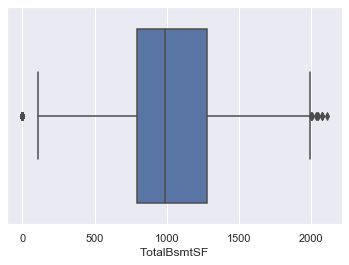

In [84]:
q = df_no_mv['TotalBsmtSF'].quantile(0.99)
df_no_mv = df_no_mv[df_no_mv['TotalBsmtSF']<q]
sns.boxplot(df_no_mv['TotalBsmtSF'])

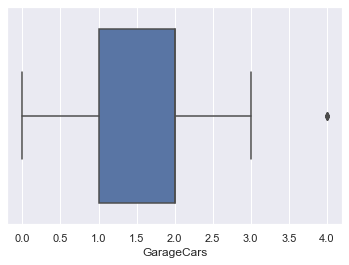

In [85]:
sns.boxplot(df_no_mv['GarageCars'])

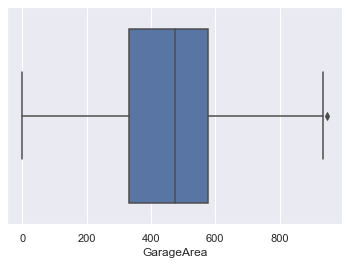

In [86]:
q = df_no_mv['GarageArea'].quantile(0.99)
df_no_mv = df_no_mv[df_no_mv['GarageArea']<q]
sns.boxplot(df_no_mv['GarageArea'])

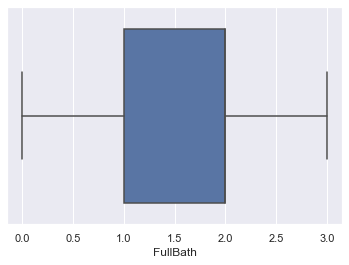

In [87]:
sns.boxplot(df_no_mv['FullBath'])

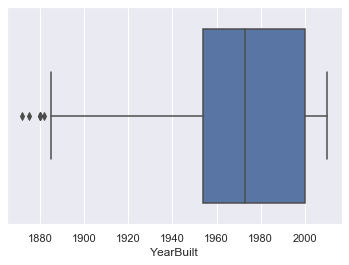

In [88]:
sns.boxplot(df_no_mv['YearBuilt'])

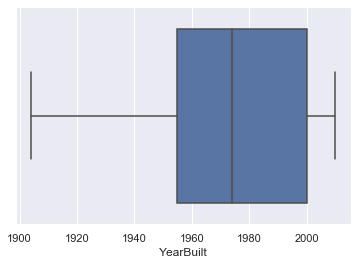

In [89]:
q = df_no_mv['YearBuilt'].quantile(0.01)
df_no_mv = df_no_mv[df_no_mv['YearBuilt']>q]
sns.boxplot(df_no_mv['YearBuilt'])

In [90]:
data_cleaned = df_no_mv.reset_index(drop=True)

# Checking the OLS assumptions

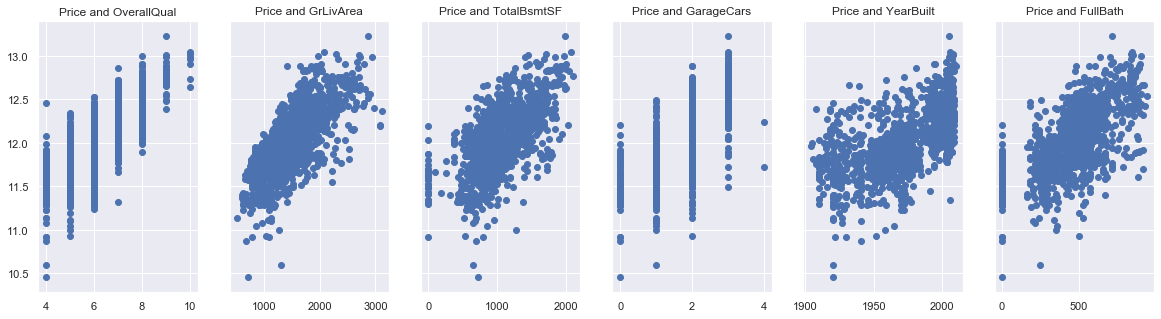

In [91]:
# OverallQual, GrLivArea, GarageCars, TotalBsmtSF, FullBath, YearBuilt
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, sharey=True, figsize =(20,5)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['OverallQual'],data_cleaned['Log_SalePrice'])
ax1.set_title('Price and OverallQual')
ax2.scatter(data_cleaned['GrLivArea'],data_cleaned['Log_SalePrice'])
ax2.set_title('Price and GrLivArea')
ax3.scatter(data_cleaned['TotalBsmtSF'],data_cleaned['Log_SalePrice'])
ax3.set_title('Price and TotalBsmtSF')
ax4.scatter(data_cleaned['GarageCars'],data_cleaned['Log_SalePrice'])
ax4.set_title('Price and GarageCars')
ax5.scatter(data_cleaned['YearBuilt'],data_cleaned['Log_SalePrice'])
ax5.set_title('Price and YearBuilt')
ax6.scatter(data_cleaned['GarageArea'],data_cleaned['Log_SalePrice'])
ax6.set_title('Price and FullBath')

plt.show()

## Multicollinearity

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['OverallQual','GrLivArea', 'TotalBsmtSF','GarageCars', 'FullBath','YearBuilt']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [93]:
vif

,VIF,Features
0,53.850294,OverallQual
1,21.691405,GrLivArea
2,11.962170,TotalBsmtSF
3,12.036628,GarageCars
4,17.131766,FullBath
5,27.818611,YearBuilt


In [94]:
features = data_cleaned[['OverallQual','GrLivArea', 'TotalBsmtSF','GarageCars', 'FullBath','YearBuilt']]
targets = data_cleaned['Log_SalePrice']

## Scale data

In [95]:
scaler = StandardScaler()
scaler.fit(features)

c:\users\abderrahim\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [96]:
inputs_scaled = scaler.transform(features)
inputs_scaled_df = pd.DataFrame(inputs_scaled)

c:\users\abderrahim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [99]:
df_cat_var = data_cleaned[cat_var]
df_cat_var = pd.get_dummies(df_cat_var, drop_first=True)
inputs_scaled_df.columns.values

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [100]:
data = pd.concat([inputs_scaled_df, df_cat_var], axis=1, names=[])

## Split train test

In [101]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

## Regression

### LinearRegression

In [102]:
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train), mse(y_test, reg.predict(x_test))**0.5)

0.836678699214199 0.15836906565492986


### RidgeCV

In [103]:
reg = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
reg.fit(x_train,y_train)
alpha = reg.alpha_
reg = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
reg.fit(x_train,y_train)
alpha = reg.alpha_
reg = RidgeCV(alphas=[alpha])
reg.fit(x_train,y_train)
mse(y_test, reg.predict(x_test))**0.5

0.15834520019481735

 ### DecisionTree Regressor

In [104]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    error = mse(val_y, preds_val)
    return error

for max_leaf_nodes in range(35, 50):
    my_mae = get_mae(max_leaf_nodes, x_train, x_test, y_train, y_test)
    print("Max leaf nodes: ",max_leaf_nodes,"\t Mean Absolute Error: " , my_mae**0.5)

Max leaf nodes:  35 	 Mean Absolute Error:  0.1776879369045224
Max leaf nodes:  36 	 Mean Absolute Error:  0.17533394759621804
Max leaf nodes:  37 	 Mean Absolute Error:  0.17543407369499261
Max leaf nodes:  38 	 Mean Absolute Error:  0.1742915536036271
Max leaf nodes:  39 	 Mean Absolute Error:  0.17416293428542756
Max leaf nodes:  40 	 Mean Absolute Error:  0.17394013861132
Max leaf nodes:  41 	 Mean Absolute Error:  0.1736093470115759
Max leaf nodes:  42 	 Mean Absolute Error:  0.17413702225060415
Max leaf nodes:  43 	 Mean Absolute Error:  0.17761188190097915
Max leaf nodes:  44 	 Mean Absolute Error:  0.1773392798111455
Max leaf nodes:  45 	 Mean Absolute Error:  0.17691841144748557
Max leaf nodes:  46 	 Mean Absolute Error:  0.17739441451148674
Max leaf nodes:  47 	 Mean Absolute Error:  0.17730282328347707
Max leaf nodes:  48 	 Mean Absolute Error:  0.17730282328347707
Max leaf nodes:  49 	 Mean Absolute Error:  0.17600922098295096


In [111]:
def get_mae(alpha,train_X, val_X, train_y, val_y):
    model = LassoCV(alphas=[alpha],normalize=True, max_iter=1e5)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    error = mse(val_y, preds_val)
    return error

np.sqrt(get_mae(.0005, x_train, x_test, y_train, y_test))

c:\users\abderrahim\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.15768367553920118

In [268]:
y_hat = reg.predict(x_train)

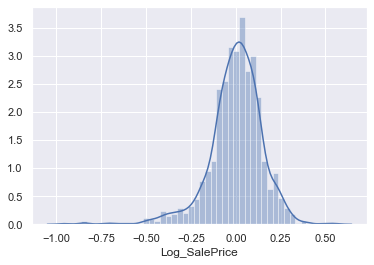

In [269]:
sns.distplot(y_train - y_hat)

In [270]:
y_hat_test = reg.predict(x_test)

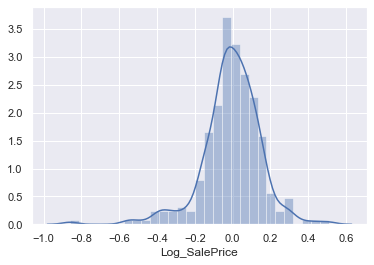

In [271]:
sns.distplot(y_test - y_hat_test)


In [272]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,189356.735023
1,124868.056083
2,219198.775159
3,112089.009388
4,116358.381621


In [273]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target'])
df_pf.head()

,Prediction,Target,Residual,Difference%
0,189356.735023,127500.0,-61856.735023,0.485151
1,124868.056083,116900.0,-7968.056083,0.068161
2,219198.775159,206300.0,-12898.775159,0.062524
3,112089.009388,134432.0,22342.990612,0.166203
4,116358.381621,124500.0,8141.618379,0.065395


In [274]:
reg.coef_

array([ 0.10242146,  0.13611702,  0.07811381,  0.04132745, -0.01337784,
        0.06847146])

In [275]:
reg.intercept_

12.00849760349436

In [276]:
reg.score(x_train,y_train)

0.8194616764753929

In [277]:
from sklearn.metrics import mean_squared_error

In [278]:
mean_squared_error(y_test, y_hat_test)

0.02434116566018471

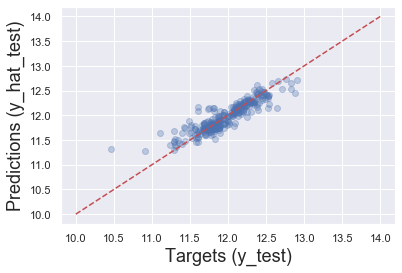

In [279]:
plt.scatter(y_test, y_hat_test, alpha=0.3)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.plot([10.,14.], [10.,14.], '--', c='r')
plt.show()

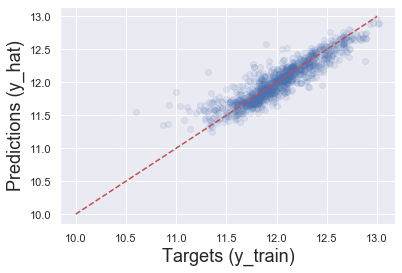

In [280]:
plt.scatter(y_train, y_hat, alpha=0.1)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.plot([10.,13.], [10.,13.], '--', c='r')
plt.show()